In [1]:
drive_path = 'c:/'
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ks_2samp
from scipy.stats import anderson_ksamp
from scipy.stats import kruskal
from scipy.stats import variation
from scipy import signal as sps
import seaborn as sns

In [2]:
names=['Plane','Time','Elapsed (ms)']
df=pd.read_table('C:\\Users\Annie\Desktop\\160621_1_Notepad\\20.txt',skiprows=4)
names.extend([col for col in df.columns if 'G PMT' in col])
df=df.loc[df.Plane != 0,df.columns.isin(names)]
df.head()

,Plane,Time,Elapsed (ms),G PMT (1),G PMT (2),G PMT (3),G PMT (4),G PMT (5),G PMT (6),G PMT (7),G PMT (8),G PMT (9),G PMT (10),G PMT (11),G PMT (12),G PMT (13),G PMT (14)
1,1,10:21:13,165,949.477,735.733,1065.513,1381.224,1194.270,490.099,477.300,654.640,643.193,401.688,2277.783,469.838,893.747,662.190
2,2,10:21:13,330,948.045,725.040,1034.243,1388.122,1206.571,501.481,468.700,615.288,618.140,399.018,2308.841,443.351,862.099,673.037
3,3,10:21:13,495,932.080,694.613,992.522,1389.714,1119.937,493.889,479.478,621.955,643.632,387.550,2279.609,451.054,860.484,659.693
4,4,10:21:13,660,932.926,739.600,1017.983,1361.653,1189.238,511.790,486.844,623.090,636.000,418.486,2348.217,451.581,878.088,668.865
5,5,10:21:13,826,926.523,731.067,1052.357,1373.224,1193.540,488.691,473.200,646.180,616.158,417.596,2391.928,487.189,869.769,665.221


In [3]:
# odf is the original dataframe, only G PMT columns in this dataframe
odf=df[[col for col in df.columns if 'G PMT' in col]]
odf.head()

,G PMT (1),G PMT (2),G PMT (3),G PMT (4),G PMT (5),G PMT (6),G PMT (7),G PMT (8),G PMT (9),G PMT (10),G PMT (11),G PMT (12),G PMT (13),G PMT (14)
1,949.477,735.733,1065.513,1381.224,1194.270,490.099,477.300,654.640,643.193,401.688,2277.783,469.838,893.747,662.190
2,948.045,725.040,1034.243,1388.122,1206.571,501.481,468.700,615.288,618.140,399.018,2308.841,443.351,862.099,673.037
3,932.080,694.613,992.522,1389.714,1119.937,493.889,479.478,621.955,643.632,387.550,2279.609,451.054,860.484,659.693
4,932.926,739.600,1017.983,1361.653,1189.238,511.790,486.844,623.090,636.000,418.486,2348.217,451.581,878.088,668.865
5,926.523,731.067,1052.357,1373.224,1193.540,488.691,473.200,646.180,616.158,417.596,2391.928,487.189,869.769,665.221


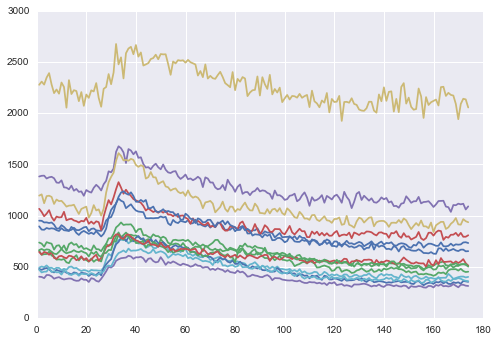

In [4]:
plt.figure();
plt.plot(odf);

In [5]:
#ZERO PHASE FILTER
order=5
dodf=sps.filtfilt([1]*order,[order],odf['G PMT (1)'])
ndodf=sps.detrend(dodf,bp=(10,100,120,140))
# dodf=sps.detrend(dodf[:,1],bp=(10,18))
# dodf_1=sps.detrend(dodf[1],bp=(1,20))

In [6]:
#WIENER FILTER
# dodf=sps.detrend(dodf,bp=(10,15))
wdodf=sps.wiener(odf,2)
morewdodf=sps.detrend(wdodf[:,3],type='linear',bp=(1,15,30,120))
# dodf_1=sps.detrend(dodf[1],bp=(1,20))

# Detrending, no filtering, after DF/F calculated

In [7]:
odf.head()

,G PMT (1),G PMT (2),G PMT (3),G PMT (4),G PMT (5),G PMT (6),G PMT (7),G PMT (8),G PMT (9),G PMT (10),G PMT (11),G PMT (12),G PMT (13),G PMT (14)
1,949.477,735.733,1065.513,1381.224,1194.270,490.099,477.300,654.640,643.193,401.688,2277.783,469.838,893.747,662.190
2,948.045,725.040,1034.243,1388.122,1206.571,501.481,468.700,615.288,618.140,399.018,2308.841,443.351,862.099,673.037
3,932.080,694.613,992.522,1389.714,1119.937,493.889,479.478,621.955,643.632,387.550,2279.609,451.054,860.484,659.693
4,932.926,739.600,1017.983,1361.653,1189.238,511.790,486.844,623.090,636.000,418.486,2348.217,451.581,878.088,668.865
5,926.523,731.067,1052.357,1373.224,1193.540,488.691,473.200,646.180,616.158,417.596,2391.928,487.189,869.769,665.221


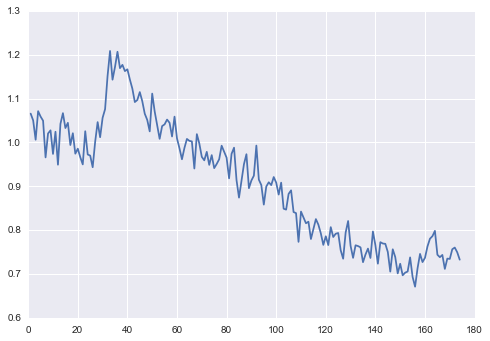

In [8]:
# Divided is DF/F
baseline=pd.DataFrame(odf.iloc[5:26,1]).mean();
example=pd.DataFrame(odf.iloc[:,1]);
divided=example.divide(baseline);
plt.figure();
plt.plot(divided);

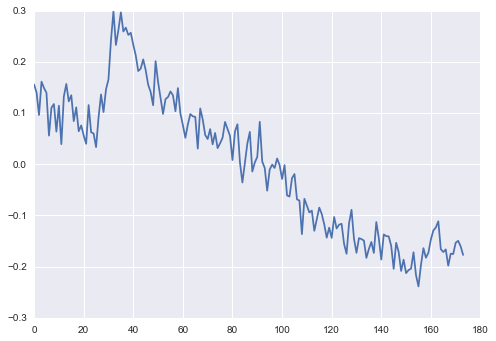

In [89]:
detrend_divided=sps.detrend(divided,type='constant',axis=0)
plt.plot(detrend_divided);

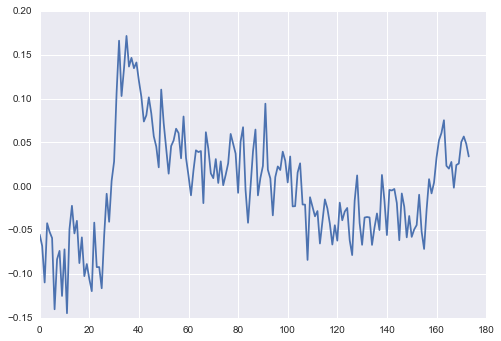

In [95]:
# Detrending twice first with a constant and then with linear does nothing
# Just makes it back to whatever it would look like with one detrending
#constant is better for the beginning and linear is better for the ending
detrend_again=sps.detrend(detrend_divided,type='linear',axis=0)
plt.plot(detrend_again)

# wdodf is dataframe with the wiener filter applied

In [30]:
# This applies a wiener filter before detrending
baseline=pd.DataFrame(wdodf[10:26,1]).mean();
example=pd.DataFrame(wdodf[:,1]);
divided=example.divide(baseline);
plt.figure();
plt.plot(divided);
# plt.plot(example);
detrend_divided=sps.detrend(divided,axis=0,bp=(5,140))
plt.plot(detrend_divided);

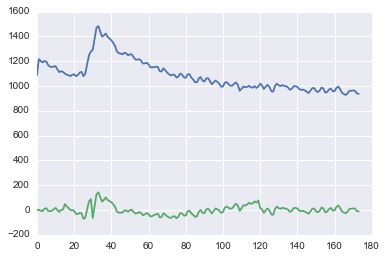

In [382]:
# Comparison between weiner filter (wdodf) and first weiner second detrend
plt.plot(wdodf[:,3]);
plt.plot(morewdodf);

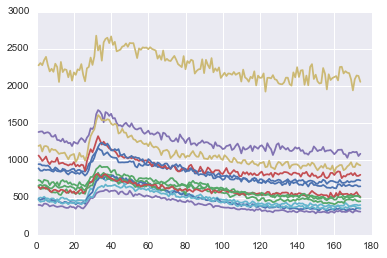

In [334]:
plt.plot(odf);

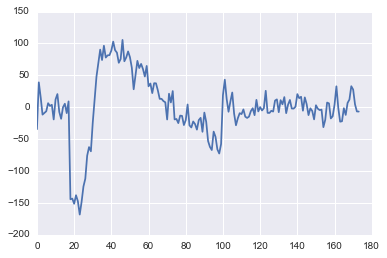

In [335]:
plt.plot(morewdodf);

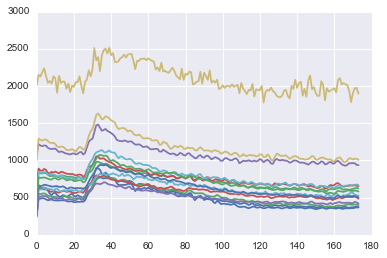

In [330]:
plt.plot(wdodf);

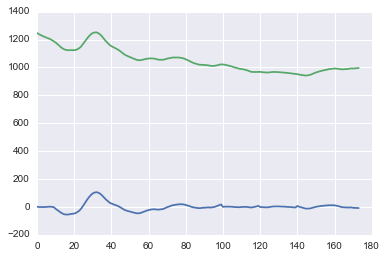

In [319]:
#Zero phase filter (filtfilt from datta lab)
plt.plot(ndodf);
plt.plot(dodf);

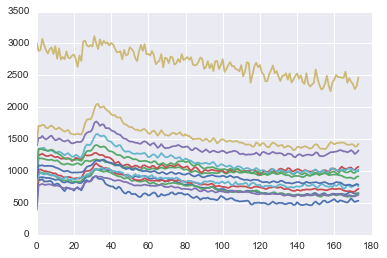

In [321]:
plt.figure();
plt.plot(wdodf);

In [156]:
divided.to_csv('divided')

# Detrend data using a moving window average

In [106]:
import matplotlib.mlab as mlab

In [123]:
a=mlab.detrend(divided,'mean',axis=0)
b=mlab.detrend(a,'linear',axis=0)
c=mlab.detrend(b,'mean',axis=0)

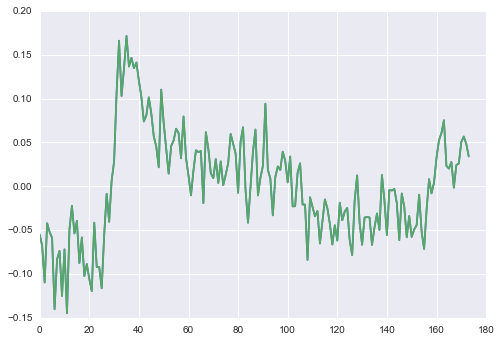

In [126]:
plt.plot(c);
plt.plot(b);

In [127]:
import obspy

In [139]:
obspy.core.trace.Trace.detrend(darray)

TypeError: unbound method detrend() must be called with Trace instance as first argument (got ndarray instance instead)

In [149]:
darray=divided.iloc[:,0].values

array([ 1.06569619,  1.05020757,  1.0061346 ,  1.07129747,  1.05893757,
        1.0495123 ,  0.96582913,  1.02038766,  1.02757214,  0.9737277 ,
        1.02440575,  0.94914262,  1.04230899,  1.0667782 ,  1.03280695,
        1.04474244,  0.99408323,  1.02100617,  0.97432593,  0.98572114,
        0.96631148,  0.94987555,  1.0256022 ,  0.97245304,  0.97000076,
        0.94340663,  1.00148062,  1.04634447,  1.01189087,  1.05613621,
        1.07585584,  1.15158249,  1.20865269,  1.14310308,  1.17215094,
        1.20681747,  1.1694278 ,  1.17692079,  1.16268656,  1.16678142,
        1.14345072,  1.12263168,  1.0921165 ,  1.09677193,  1.11482871,
        1.0940285 ,  1.06548471,  1.05134752,  1.02519662,  1.11141029,
        1.07066014,  1.03933381,  1.00822041,  1.03726828,  1.04120815,
        1.0521775 ,  1.04472217,  1.013532  ,  1.05880141,  1.00910978,
        0.98649318,  0.96157928,  0.98745932,  1.00800893,  1.00356644,
        1.00233088,  0.94047055,  1.01892035,  0.99754075,  0.96

In [151]:
dtrace=obspy.core.trace.Trace(darray)

In [153]:
dtrace.detrend(type='simple')

ImportError: Your current ObsPy installation does not support any Detrend functions. Please make sure SciPy is installed properly.